### In this notebook, we compare the LFP signals obtained with an infinitesimal electrode to those obained with a spherical electrode with radius 6 $\mu$m

In [1]:
import numpy as np
import h5py
import pandas as pd
import bluepysnap as bp

In [2]:
s = bp.Simulation('simulation_config.json')

In [3]:
population_name = s.reports['lfp_report'].population_names[0]

r  = s.reports['lfp_report'][population_name]

In [4]:
allData = r.get()

In [5]:
allData.columns = pd.MultiIndex.from_product((np.unique(allData.columns.get_level_values(0)),['Infinitesimal','Finite','Testing']),names=['gid','electrode'])


In [6]:
import matplotlib.pyplot as plt
%matplotlib ipympl

In [8]:
sumData = allData.groupby(axis=1, level='electrode').sum() # Sums over all neural LF contributions to get total signal


/tmp/ipykernel_22983/4012139500.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sumData = allData.groupby(axis=1, level='electrode').sum() # Sums over all neural LF contributions to get total signal


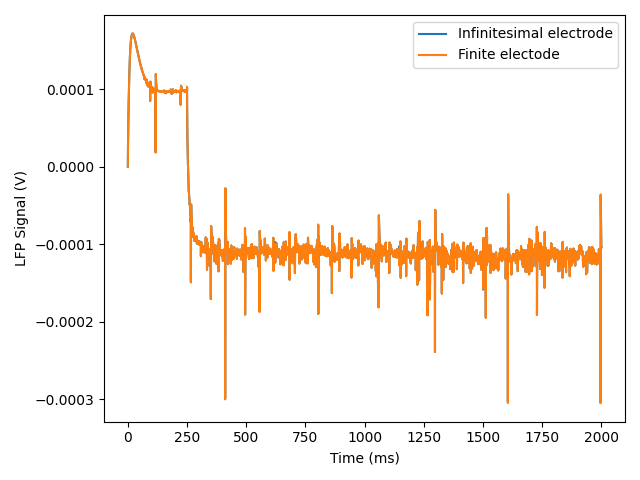

In [10]:
plt.figure()
plt.plot(sumData['Infinitesimal'])
plt.plot(sumData['Finite'])
plt.xlabel('Time (ms)')
plt.ylabel('LFP Signal (V)')
plt.legend(['Infinitesimal electrode','Finite electode'])
plt.tight_layout()

### Next, we calculate the maximum difference between the two signals, relative to the amplitude value of the signal at the point of maximum difference 

In [11]:
difference = sumData['Finite']-sumData['Infinitesimal']

In [12]:
maxDiffIdx = np.argmax(np.abs(difference))

In [13]:
np.abs(difference).values[maxDiffIdx]/np.abs(sumData['Finite']).values[maxDiffIdx]

0.009940086